In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

print("Bùi Hoàn Duy - 6351071012")
sns.set(style="whitegrid")
%matplotlib inline
data = pd.read_csv("dataset/winequality-red.csv")
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
display(data.head())


Bùi Hoàn Duy - 6351071012
Shape: (1599, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Câu 3

Bùi Hoàn Duy - 6351071012


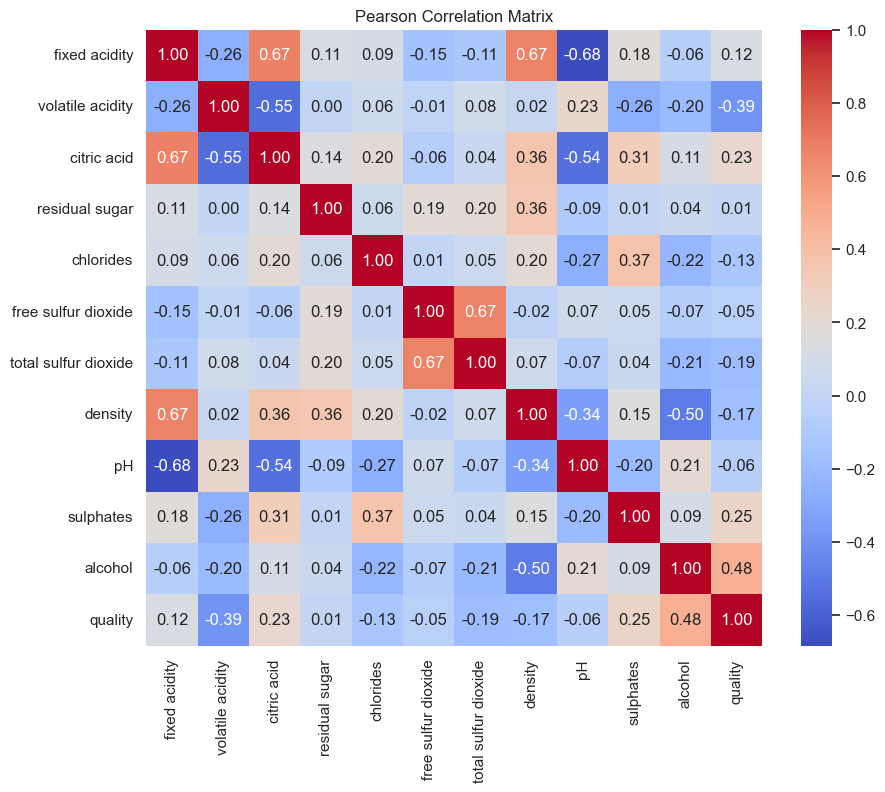

Cột sẽ bị loại (|corr| > 0.80): set()
Shape sau khi drop: (1599, 12)


In [ ]:
numeric = data.select_dtypes(include=[np.number])
corr = numeric.corr(method="pearson")
print("Bùi Hoàn Duy - 6351071012")

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix")
plt.show()

threshold = 0.80
cols = corr.columns
to_drop = set()
for i in range(len(cols)):
    for j in range(i):
        if abs(corr.iloc[i,j]) > threshold:
            to_drop.add(cols[i])

print("Cột sẽ bị loại (|corr| > {:.2f}):".format(threshold), to_drop)

data_filtered = data.drop(columns=list(to_drop))
print("Shape sau khi drop:", data_filtered.shape)

Câu 4

In [3]:
features = data_filtered.drop(columns=["quality"])
labels = data_filtered["quality"]
print("Bùi Hoàn Duy - 6351071012")

print("features shape:", features.shape)
print("labels shape:", labels.shape)


Bùi Hoàn Duy - 6351071012
features shape: (1599, 11)
labels shape: (1599,)


Câu 5

In [4]:
cat_cols = features.select_dtypes(exclude=[np.number]).columns.tolist()
print("Bùi Hoàn Duy - 6351071012")

print("Categorical columns:", cat_cols)

if len(cat_cols) > 0:
    features_encoded = pd.get_dummies(features, columns=cat_cols, drop_first=False)
else:
    features_encoded = features.copy()

print("Kích thước features sau encode:", features_encoded.shape)


Bùi Hoàn Duy - 6351071012
Categorical columns: []
Kích thước features sau encode: (1599, 11)


Câu 6

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, labels, test_size=0.3, random_state=42, stratify=labels
)
print("Bùi Hoàn Duy - 6351071012")

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Bùi Hoàn Duy - 6351071012
X_train: (1119, 11) X_test: (480, 11)
y_train: (1119,) y_test: (480,)


Câu 7

ID3 Accuracy: 0.575
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.36      0.31      0.33        16
           5       0.68      0.65      0.66       204
           6       0.56      0.56      0.56       192
           7       0.43      0.48      0.45        60
           8       0.20      0.40      0.27         5

    accuracy                           0.57       480
   macro avg       0.45      0.46      0.45       480
weighted avg       0.58      0.57      0.58       480

Bùi Hoàn Duy - 6351071012


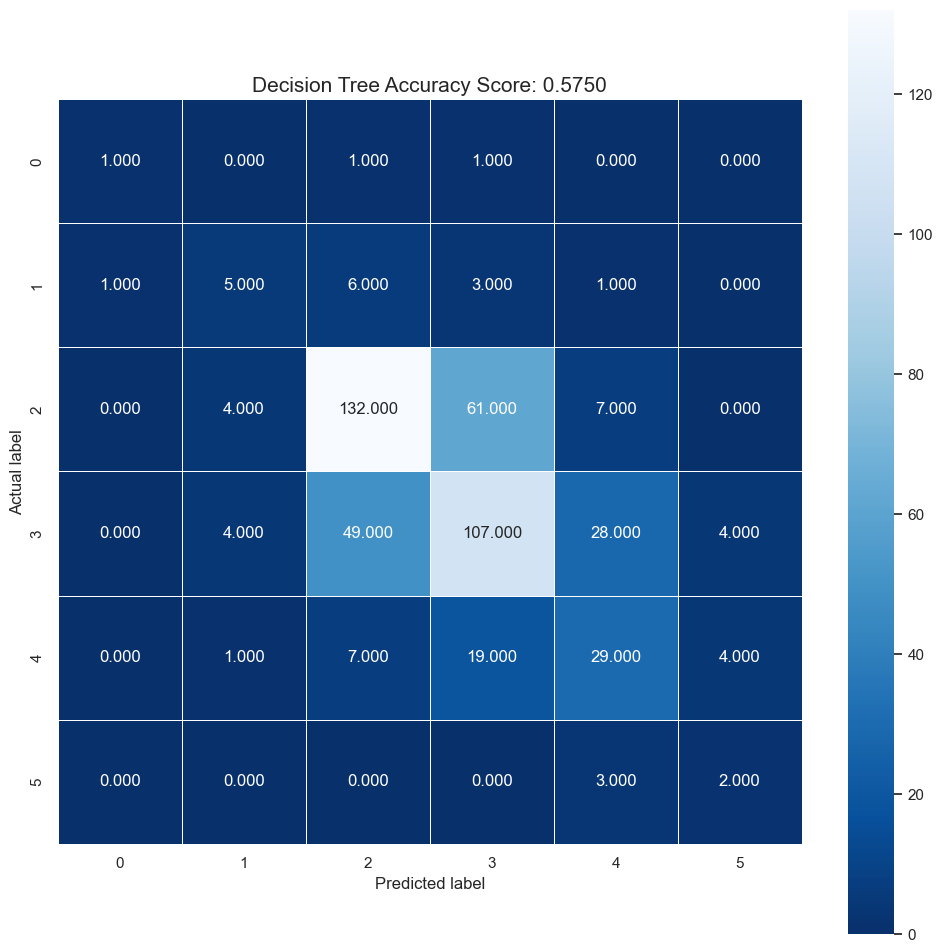

Bùi Hoàn Duy - 6351071012


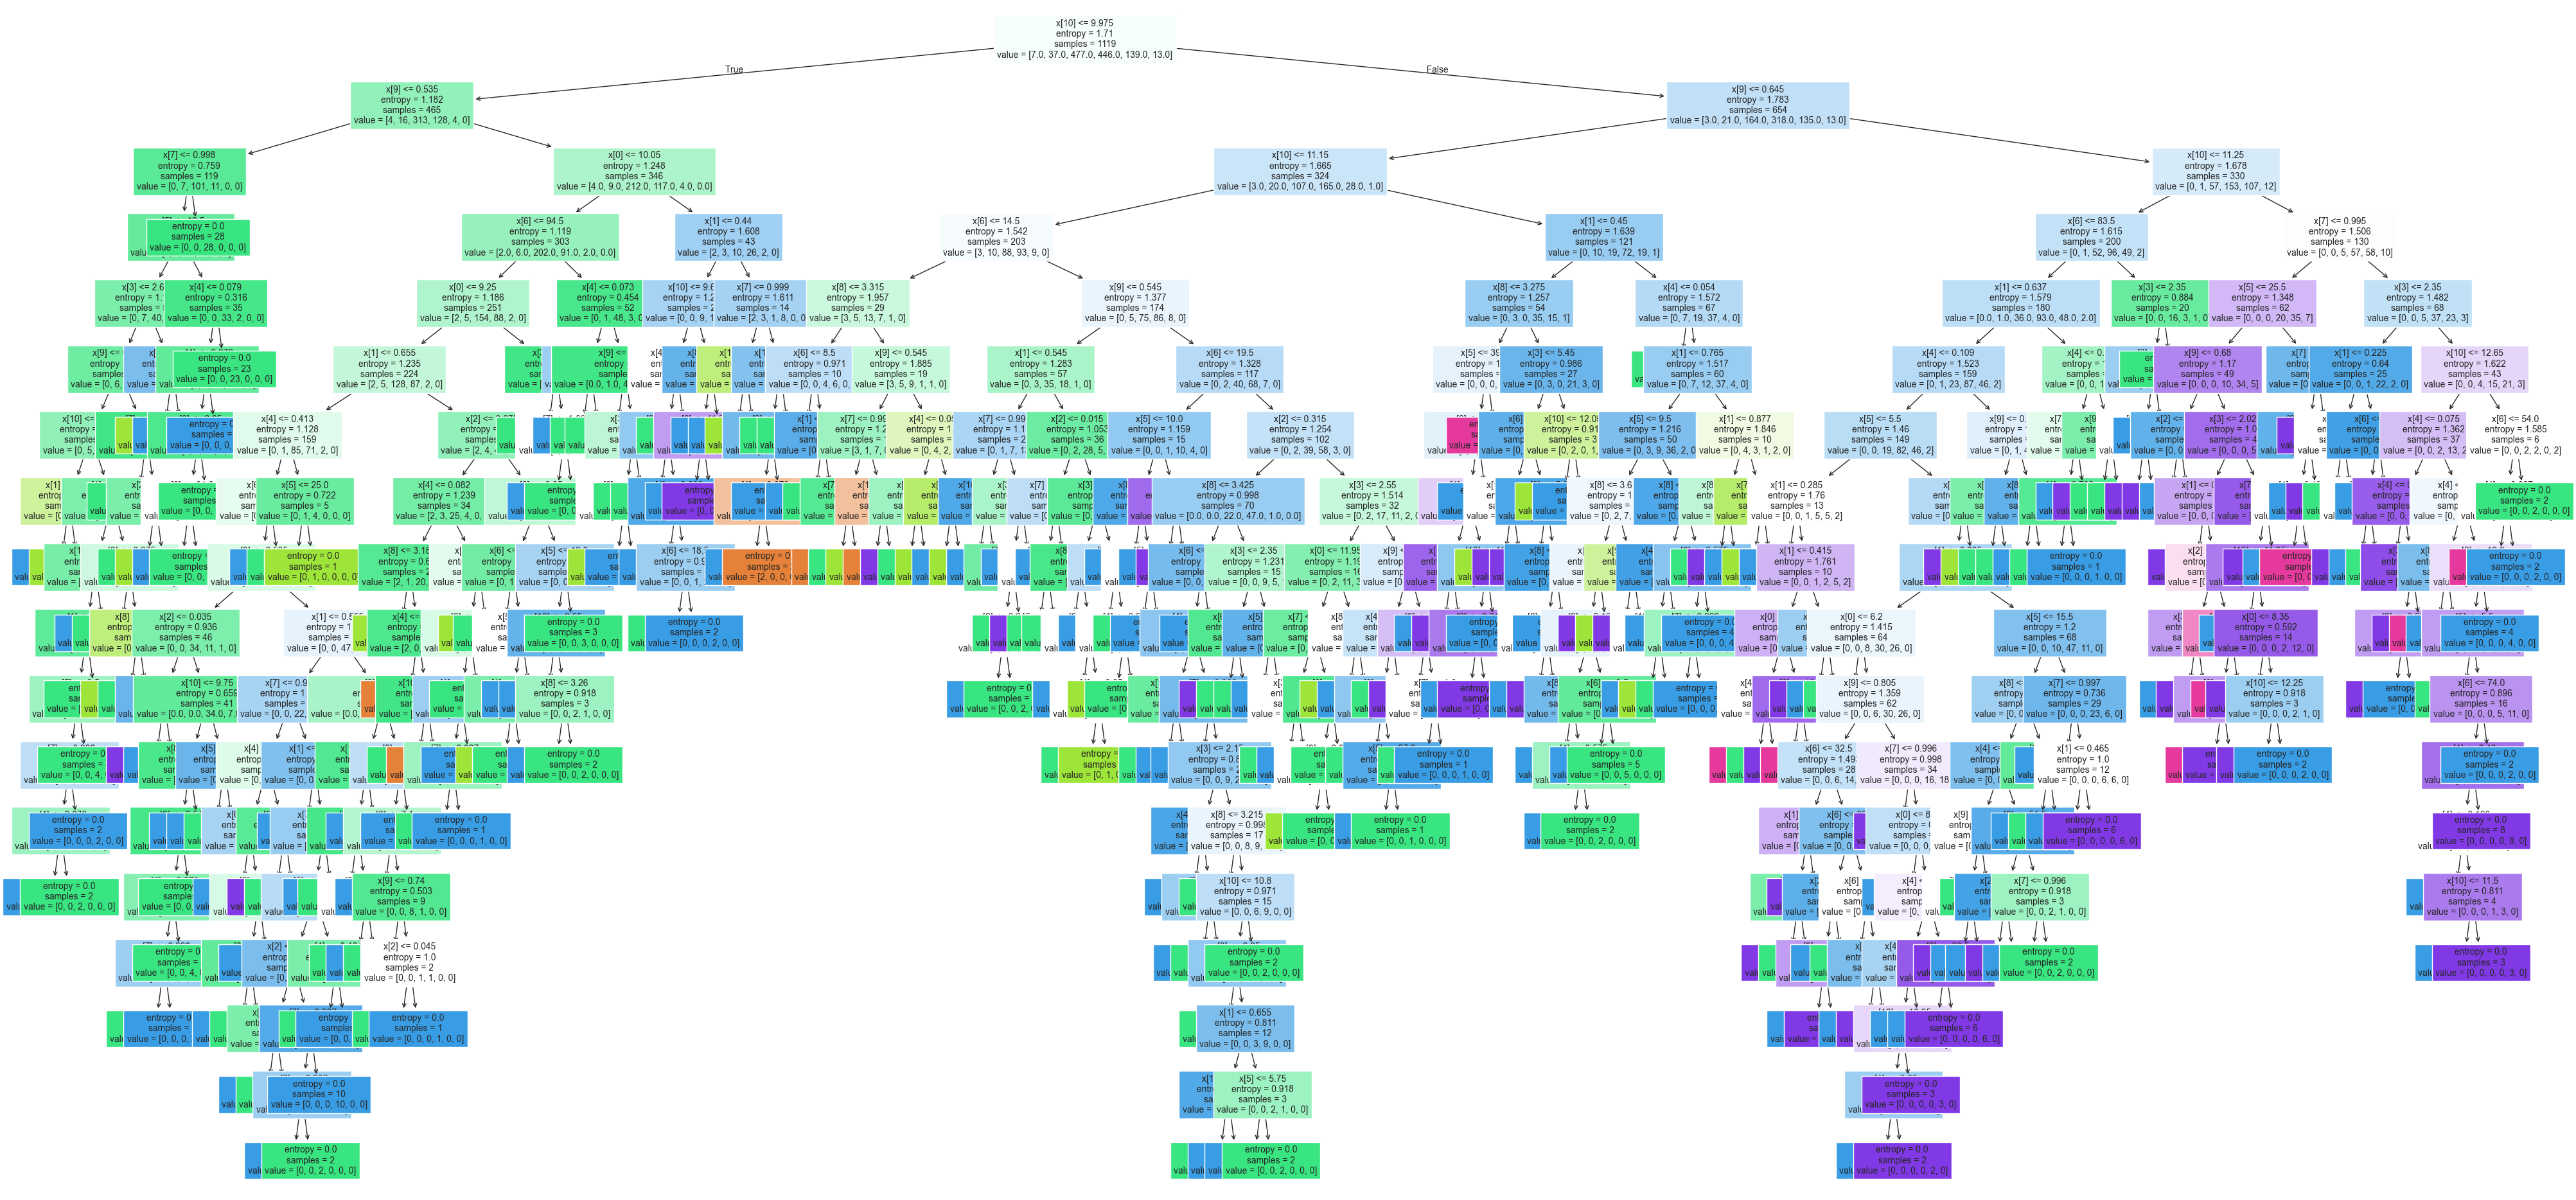

In [ ]:
clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)
id3_pred = clf_id3.predict(X_test)
id3_acc = accuracy_score(y_test, id3_pred)
print("ID3 Accuracy:", id3_acc)
print(classification_report(y_test, id3_pred))

cm = confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {:.4f}'.format(id3_acc), size=15)
print("Bùi Hoàn Duy - 6351071012")
plt.show()
print("Bùi Hoàn Duy - 6351071012")

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_id3, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=10)
plt.show()


Câu 8


CART Accuracy: 0.575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.19      0.18        16
           5       0.65      0.64      0.65       204
           6       0.58      0.57      0.58       192
           7       0.45      0.52      0.48        60
           8       0.50      0.20      0.29         5

    accuracy                           0.57       480
   macro avg       0.39      0.35      0.36       480
weighted avg       0.58      0.57      0.57       480

Bùi Hoàn Duy - 6351071012


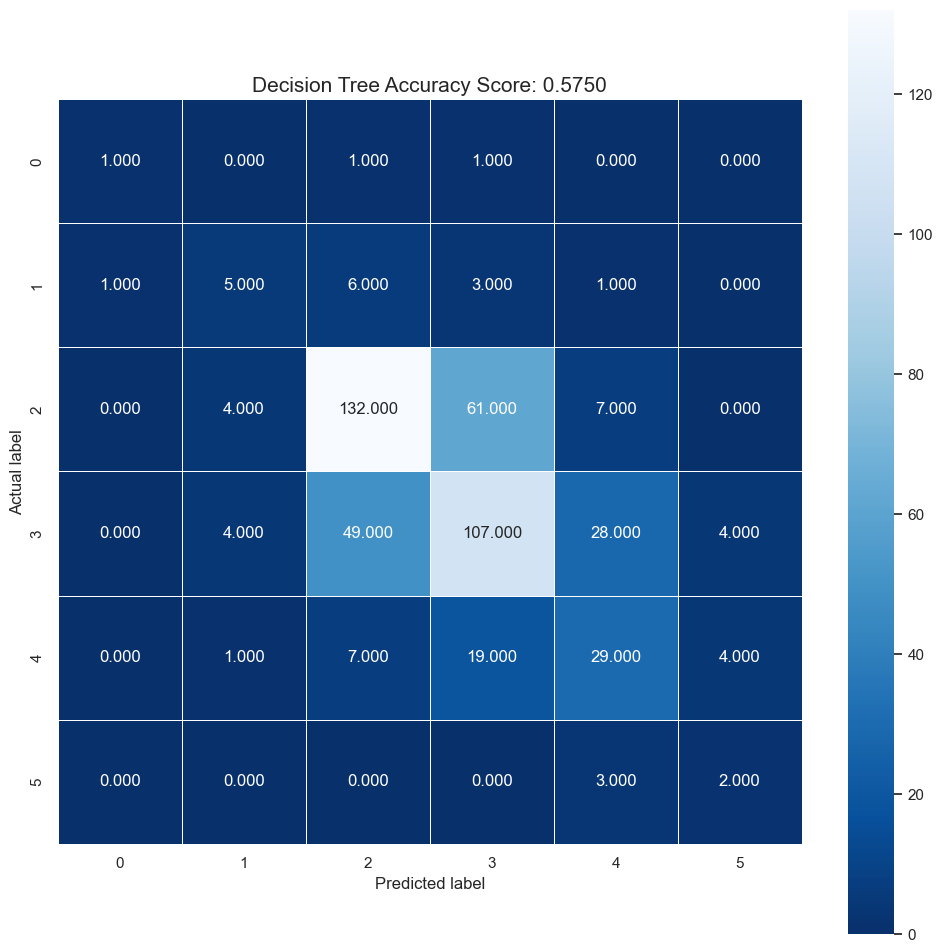

Bùi Hoàn Duy - 6351071012


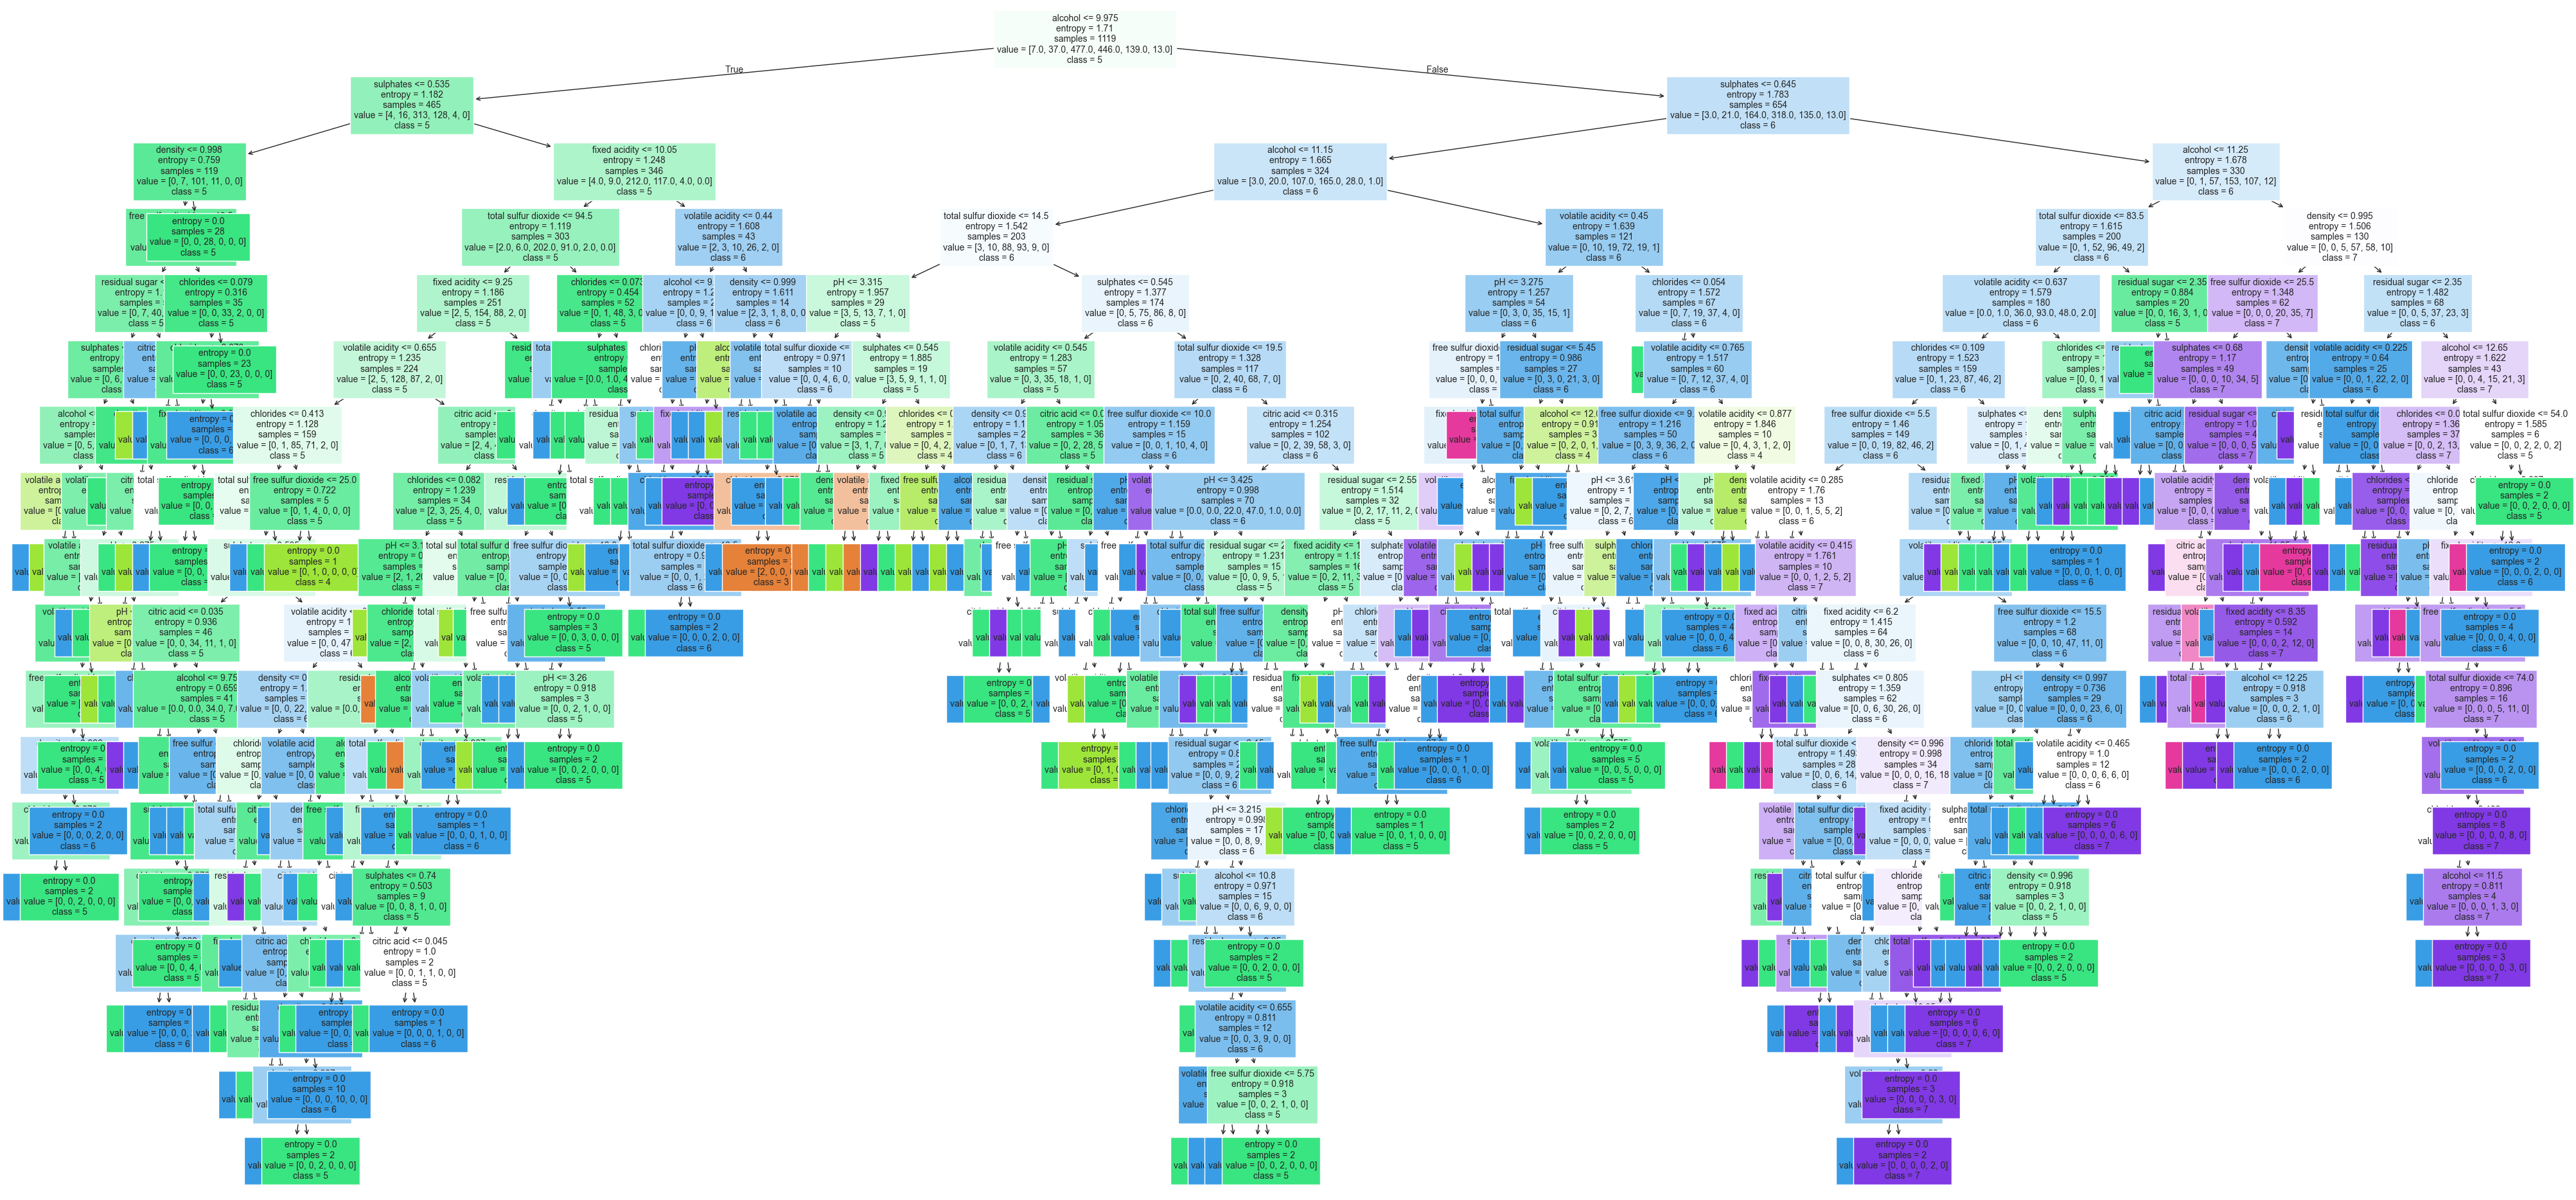

In [ ]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)
cart_pred = clf_cart.predict(X_test)
cart_acc = accuracy_score(y_test, cart_pred)
print("CART Accuracy:", cart_acc)
print(classification_report(y_test, cart_pred))

cm = confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {:.4f}'.format(id3_acc), size=15)
print("Bùi Hoàn Duy - 6351071012")
plt.show()

print("Bùi Hoàn Duy - 6351071012")

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(
    clf_id3,
    filled=True,
    feature_names=features_encoded.columns,
    class_names=[str(c) for c in clf_id3.classes_],
    fontsize=10
)
plt.savefig("decision_tree.png", dpi=100)
plt.show()



Câu 9

Naive Bayes Accuracy: 0.5604166666666667
              precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.05      0.06      0.06        16
           5       0.66      0.64      0.65       204
           6       0.56      0.53      0.54       192
           7       0.52      0.57      0.54        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.32      0.36      0.33       480
weighted avg       0.57      0.56      0.57       480

Bùi Hoàn Duy - 6351071012


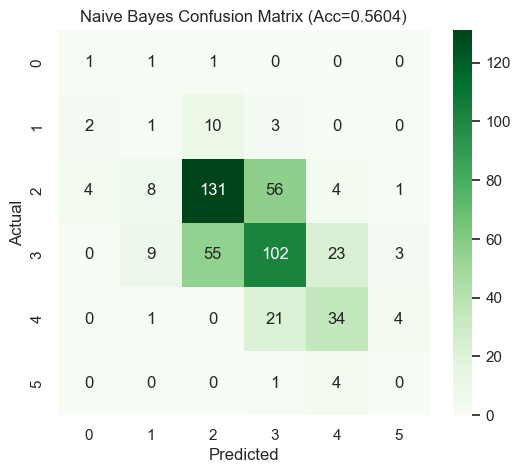

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_pred = gnb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))
print("Bùi Hoàn Duy - 6351071012")

cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(f"Naive Bayes Confusion Matrix (Acc={nb_acc:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Câu 10

Model  Accuracy
0  ID3 (entropy)  0.575000
1    CART (gini)  0.575000
2     GaussianNB  0.560417

Bùi Hoàn Duy - 6351071012


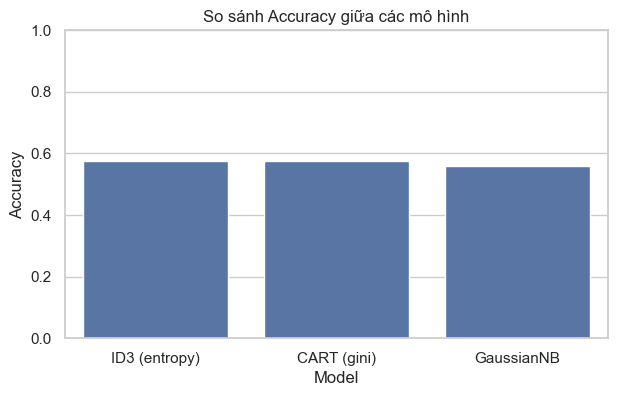

In [9]:
results = {
    "Model": ["ID3 (entropy)", "CART (gini)", "GaussianNB"],
    "Accuracy": [id3_acc, cart_acc, nb_acc]
}
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display(results_df)
print("Bùi Hoàn Duy - 6351071012")

# Bar chart
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.ylim(0,1)
plt.title("So sánh Accuracy giữa các mô hình")
plt.ylabel("Accuracy")
plt.show()
